In [66]:
import pandas as pd
from pyvi import ViTokenizer
import re
import string
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [67]:
# Load data
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [68]:
train_df.head()

id                                            comment  label
0  train_000000  Dung dc sp tot cam on \nshop Đóng gói sản phẩm...      0
1  train_000001   Chất lượng sản phẩm tuyệt vời . Son mịn nhưng...      0
2  train_000002   Chất lượng sản phẩm tuyệt vời nhưng k có hộp ...      0
3  train_000003  :(( Mình hơi thất vọng 1 chút vì mình đã kỳ vọ...      1
4  train_000004  Lần trước mình mua áo gió màu hồng rất ok mà đ...      1

In [69]:
test_df.head()

id                                            comment
0  test_000000                        Chưa dùng thử nên chưa biết
1  test_000001   Không đáng tiềnVì ngay đợt sale nên mới mua n...
2  test_000002  Cám ơn shop. Đóng gói sản phẩm rất đẹp và chắc...
3  test_000003                      Vải đẹp.phom oki luôn.quá ưng
4  test_000004                            Chuẩn hàng đóng gói đẹp

In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [74]:
train_df

id                                            comment  label
0      train_000000  Dung dc sp tot cam on \nshop Đóng gói sản phẩm...      0
1      train_000001   Chất lượng sản phẩm tuyệt vời . Son mịn nhưng...      0
2      train_000002   Chất lượng sản phẩm tuyệt vời nhưng k có hộp ...      0
3      train_000003  :(( Mình hơi thất vọng 1 chút vì mình đã kỳ vọ...      1
4      train_000004  Lần trước mình mua áo gió màu hồng rất ok mà đ...      1
5      train_000005   Chất lượng sản phẩm tuyệt vời có điều không c...      0
6      train_000006  Đã nhận đc hàng rất nhanh mới đặt buổi tối mà ...      0
7      train_000007  Các siêu phẩm thấy cấu hình toàn tựa tựa nhau....      1
8      train_000008  Hàng ship nhanh  chất lượng tốt  tư vấn nhiệt ...      0
9      train_000009  Đồng hồ đẹp nhưng 1 cái đứt dây  1 cái k chạy ...      1
10     train_000010   Chất lượng sản phẩm tuyệt vời.y hình chụp.đán...      0
11     train_000011  Hjhj shop giao hàng nhanh quá. Đẹp lắm ạ bé nh...      0
12     train_000012                              "nhìn đẹp phết nhỉ.."      0
13     train_000013  Đóng gói rất đẹp. Chất lượng sản phẩm rất tốt ...      0
14     train_000014                       Săn đc với giá 11k. Toẹt vời      0
15     train_000015                                    OK rất hài lòng      0
16     train_000016            Giao thiếu mình cái này rồi shop ơi T^T      1
17     train_000017        Chất lượng sản phẩm tuyệt vời tôi rất thích      0
18     train_000018  Giày đẹp lắm có điều dây hơi ngắn tí ạ  Chất l...      0
19     train_000019                       Yếm vải đẹp nhưng ít mẫu đẹp      0
20     train_000020   Chất lượng sản phẩm tuyệt vời Đóng gói sản ph...      0
21     train_000021  không hài lòng sản phẩm cho lắm. giặt lan đầu ...      1
22     train_000022              Giao hàng nhanh, mặc đẹp\nCám ơn shop      0
23     train_000023   Chất lượng sản phẩm tuyệt vời bao bì cute phô...      0
24     train_000024  Đồng hồ thì đẹp thật. Nhưng tại sao kim lúc ch...      1
25     train_000025  Giao hàng siêu nhanh.\nĐóng gói cẩn thận và tư...      0
26     train_000026  "Cũng hơi bất tiện xu thế này e rằng đa phằn n...      1
27     train_000027              Toàn hàng trungkhi mua quên ko coi kĩ      1
28     train_000028   Đóng gói sản phẩm rất đẹp và chắc chắn. Được ...      0
29     train_000029  Hôm nay chiên thử cá hồi, cá chiên ăn ngọt hơn...      0
30     train_000030  "máy này có cái CPU k phải skylake là thấy khô...      1
31     train_000031     Hàng vận chuyển bị nứt mẻ 1 góc.chất lượng ok.      0
32     train_000032                               Sạc tự động ngắt pin      0
33     train_000033                        Shop giao hàng kh giống màu      1
34     train_000034  Shop giao sai màu đặt màu xanh da trời shop gi...      1
35     train_000035                                khong thay den sang      1
36     train_000036  So với giá thì chất lượng tuyệt vời. capo khá ...      0
37     train_000037  Không cầm pin. Không sử dụng được\n Chất lượng...      1
38     train_000038  Những nước phát triển hàng trăm năm cũng không...      1
39     train_000039   Shop phục vụ rất tốt. \n Thời gian giao hàng ...      0
40     train_000040          Sản phẩm tốt hỗ trợ khách hàng nhiệt tình      0
41     train_000041         Giày đẹp mang êm và vừa chân lắm nha shop.      0
42     train_000042  Chất liệu và kiểu dáng thì được nhưng quần hơi...      0
43     train_000043   hàng bị lỗi nhiều quá màn hình cháy phim bị bong      1
44     train_000044   Chất lượng sản phẩm tuyệt vời Thời gian giao ...      0
45     train_000045  Chưa dùng nhưng nghe bạn m dùng r fb chất lượn...      0
46     train_000046  Uống rất ngon \nGiao hàng nhanh \nChất lượng s...      0
47     train_000047  Shop bảo làm theo yêu cầu theo yêu cầu là phải...      1
48     train_000048                              Rẻ lầm chất lượng lém      0
49     train_000049  Huỷ trước khi shop giao cho ship để đổi màu mà...      1
50     train_000050       Đóng gói sản 

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       16087 non-null  object
 1   comment  16087 non-null  object
 2   label    16087 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 377.2+ KB


In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10981 entries, 0 to 10980
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10981 non-null  object
 1   comment  10975 non-null  object
dtypes: object(2)
memory usage: 171.7+ KB


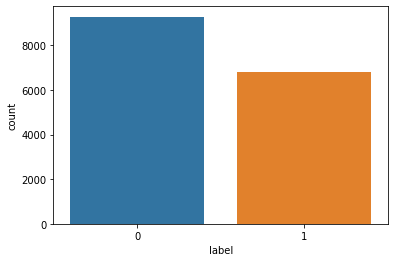

In [77]:
sns.countplot(x = train_df['label'] ,data=train_df)

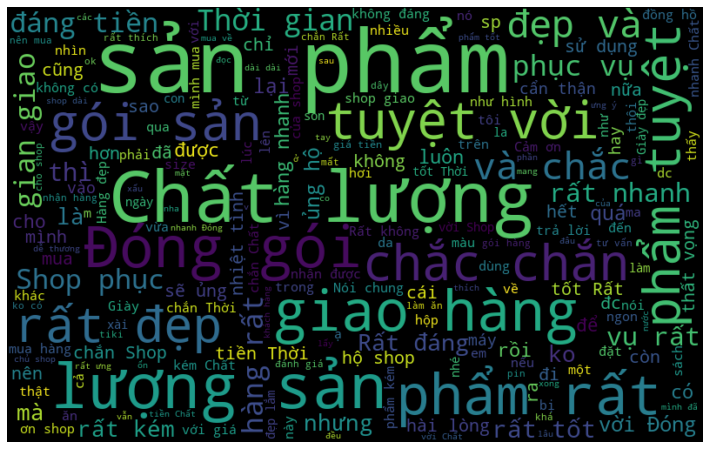

In [78]:
words = " ".join(sent for sent in train_df['comment'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

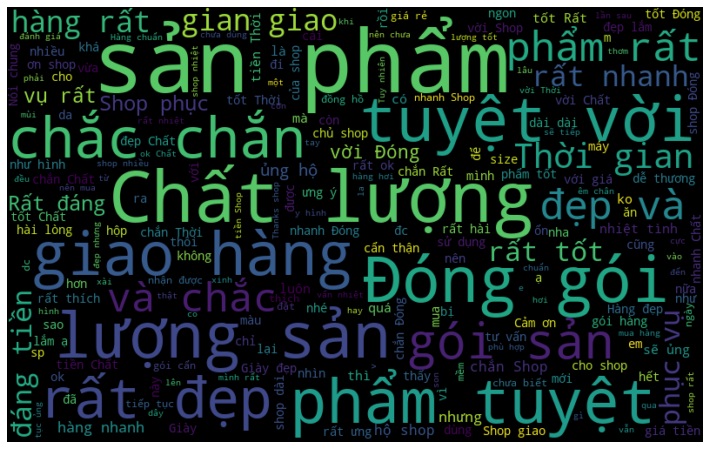

In [79]:
# positive
words = " ".join(sent for sent in train_df['comment'][train_df['label'] == 0])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

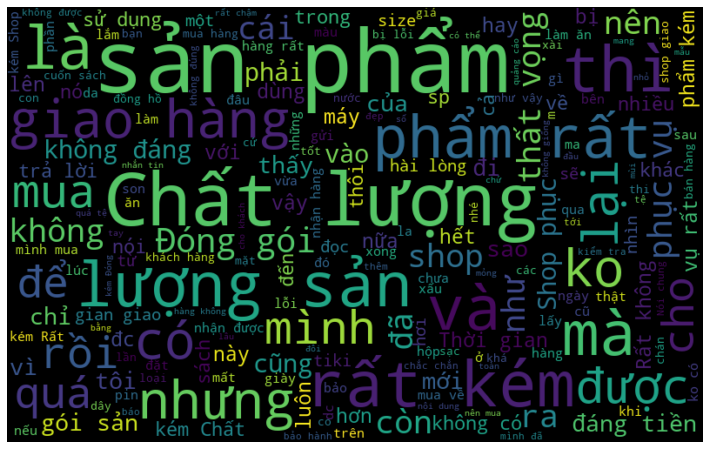

In [80]:
#negative
words = " ".join(sent for sent in train_df['comment'][train_df['label'] == 1])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Xác định emoji

In [81]:
import emoji

def extract_emojis(s):
  return [c for c in s if c in emoji.UNICODE_EMOJI['en']]

In [82]:
extract_emojis("Chất lượng sản phẩm tuyệt vời 💖\nĐóng gói sản...")

['💖']

In [83]:
## Với comment tích cực

In [84]:
good_df = train_df[train_df['label'] == 0]
good_comment = good_df['comment'].values
good_emoji = []
for c in good_comment:
    good_emoji += extract_emojis(c)

good_emoji = np.unique(np.asarray(good_emoji))

In [85]:
good_emoji

array(['↖', '↗', '☀', '☺', '♀', '♥', '✌', '✨', '❌', '❣', '❤', '⭐', '🆗',
       '🌝', '🌟', '🌧', '🌷', '🌸', '🌺', '🌼', '🍓', '🎈', '🎉', '🏻', '🏼', '🏿',
       '🐅', '🐾', '👉', '👌', '👍', '👏', '💋', '💌', '💐', '💓', '💕', '💖', '💗',
       '💙', '💚', '💛', '💜', '💞', '💟', '💥', '💪', '💮', '💯', '💰', '📑', '🖤',
       '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇', '😉', '😊', '😋', '😌', '😍',
       '😎', '😑', '😓', '😔', '😖', '😗', '😘', '😙', '😚', '😛', '😜', '😝', '😞',
       '😟', '😡', '😢', '😣', '😥', '😩', '😪', '😫', '😬', '😭', '😯', '😰', '😱',
       '😲', '😳', '😻', '😿', '🙁', '🙂', '🙃', '🙄', '🙆', '🙌', '🤑', '🤔', '🤗',
       '🤙', '🤝', '🤣', '🤤', '🤨', '🤪', '🤭'], dtype='<U1')

In [86]:
bad_df = train_df[train_df['label'] == 1]
bad_comment = bad_df['comment'].values

bad_emoji = []
for c in bad_comment:
    bad_emoji += extract_emojis(c)

bad_emoji = np.unique(np.asarray(bad_emoji))

In [87]:
bad_emoji

array(['☹', '✋', '❌', '❓', '❤', '⭐', '🎃', '🏻', '🏼', '🏿', '👌', '👍', '👎',
       '👶', '💀', '💋', '😁', '😂', '😈', '😊', '😌', '😏', '😐', '😑', '😒', '😓',
       '😔', '😖', '😚', '😞', '😟', '😠', '😡', '😢', '😣', '😤', '😥', '😧', '😩',
       '😪', '😫', '😬', '😭', '😳', '😵', '😶', '🙁', '🙂', '🙄', '🤔', '🤚', '🤤'],
      dtype='<U1')

In [88]:
import string

In [89]:
good_emoji_list = list()
for i in good_emoji:
    good_emoji_list += [{i : "positive"}]

In [90]:
good_emoji_list

[{'↖': 'positive'},
 {'↗': 'positive'},
 {'☀': 'positive'},
 {'☺': 'positive'},
 {'♀': 'positive'},
 {'♥': 'positive'},
 {'✌': 'positive'},
 {'✨': 'positive'},
 {'❌': 'positive'},
 {'❣': 'positive'},
 {'❤': 'positive'},
 {'⭐': 'positive'},
 {'🆗': 'positive'},
 {'🌝': 'positive'},
 {'🌟': 'positive'},
 {'🌧': 'positive'},
 {'🌷': 'positive'},
 {'🌸': 'positive'},
 {'🌺': 'positive'},
 {'🌼': 'positive'},
 {'🍓': 'positive'},
 {'🎈': 'positive'},
 {'🎉': 'positive'},
 {'🏻': 'positive'},
 {'🏼': 'positive'},
 {'🏿': 'positive'},
 {'🐅': 'positive'},
 {'🐾': 'positive'},
 {'👉': 'positive'},
 {'👌': 'positive'},
 {'👍': 'positive'},
 {'👏': 'positive'},
 {'💋': 'positive'},
 {'💌': 'positive'},
 {'💐': 'positive'},
 {'💓': 'positive'},
 {'💕': 'positive'},
 {'💖': 'positive'},
 {'💗': 'positive'},
 {'💙': 'positive'},
 {'💚': 'positive'},
 {'💛': 'positive'},
 {'💜': 'positive'},
 {'💞': 'positive'},
 {'💟': 'positive'},
 {'💥': 'positive'},
 {'💪': 'positive'},
 {'💮': 'positive'},
 {'💯': 'positive'},
 {'💰': 'positive'},


In [91]:
bad_emoji_list = list()
for i in bad_emoji:
    bad_emoji_list += [{i : "negative"}]

In [92]:
bad_emoji_list

[{'☹': 'negative'},
 {'✋': 'negative'},
 {'❌': 'negative'},
 {'❓': 'negative'},
 {'❤': 'negative'},
 {'⭐': 'negative'},
 {'🎃': 'negative'},
 {'🏻': 'negative'},
 {'🏼': 'negative'},
 {'🏿': 'negative'},
 {'👌': 'negative'},
 {'👍': 'negative'},
 {'👎': 'negative'},
 {'👶': 'negative'},
 {'💀': 'negative'},
 {'💋': 'negative'},
 {'😁': 'negative'},
 {'😂': 'negative'},
 {'😈': 'negative'},
 {'😊': 'negative'},
 {'😌': 'negative'},
 {'😏': 'negative'},
 {'😐': 'negative'},
 {'😑': 'negative'},
 {'😒': 'negative'},
 {'😓': 'negative'},
 {'😔': 'negative'},
 {'😖': 'negative'},
 {'😚': 'negative'},
 {'😞': 'negative'},
 {'😟': 'negative'},
 {'😠': 'negative'},
 {'😡': 'negative'},
 {'😢': 'negative'},
 {'😣': 'negative'},
 {'😤': 'negative'},
 {'😥': 'negative'},
 {'😧': 'negative'},
 {'😩': 'negative'},
 {'😪': 'negative'},
 {'😫': 'negative'},
 {'😬': 'negative'},
 {'😭': 'negative'},
 {'😳': 'negative'},
 {'😵': 'negative'},
 {'😶': 'negative'},
 {'🙁': 'negative'},
 {'🙂': 'negative'},
 {'🙄': 'negative'},
 {'🤔': 'negative'},


In [93]:
with open('data/vni_stopwords.txt', encoding="utf8") as f:
    stopwords = []
    for line in f:
        stopwords.append("_".join(line.strip().split()))
def remove_stopwords(text, stopwords):
    return " ".join([word for word in text.split() if word not in stopwords])

In [94]:
def normalize_text(text):
    # Chuyển thành chữ thường
    text = text.lower()
    #Chuẩn hóa tiếng Việt, xử lý emoj
    replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cự
        
        "👹": "nagative", 
        "👻": "positive", 
        "💃": "positive",
        '🤙': ' positive ', 
        '👍': ' positive ',
        "💄": "positive", 
        "💎": "positive",
        "💩": "positive",
        "😕": "nagative", 
        "😱": "nagative", 
        "😸": "positive",
        "😾": "nagative", 
        "🚫": "nagative",  
        "🤬": "nagative",
        "🧚": "positive",
        "🧡": "positive",
        '🐶':' positive ',
        '👎': ' nagative ',
        '😣': ' nagative ',
        '✨': ' positive ',
        '❣': ' positive ',
        '☀': ' positive ',
        '♥': ' positive ',
        '🤩': ' positive ',
        'like': ' positive ', 
        '💌': ' positive ',
        '🤣': ' positive ', 
        '🖤': ' positive ', 
        '🤤': ' positive ', 
        ':(': ' nagative ', 
        '😢': ' nagative ',
        '❤': ' positive ', 
        '😍': ' positive ', 
        '😘': ' positive ',
        '😪': ' nagative ', 
        '😊': ' positive ',
        '?': ' ? ', 
        '😁': ' positive ', 
        '💖': ' positive ', 
        '😟': ' nagative ', 
        '😭': ' nagative ',
        '💯': ' positive ', 
        '💗': ' positive ', 
        '♡': ' positive ', 
        '💜': ' positive ', 
        '🤗': ' positive ',
        '^^': ' positive ', 
        '😨': ' nagative ', 
        '☺': ' positive ', 
        '💋': ' positive ', 
        '👌': ' positive ',
        '😖': ' nagative ', 
        '😀': ' positive ', 
        ':((': ' nagative ', 
        '😡': ' nagative ', 
        '😠': ' nagative ',
        '😒': ' nagative ', 
        '🙂': ' positive ', 
        '😏': ' nagative ', 
        '😝': ' positive ', 
        '😄': ' positive ',
        '😙': ' positive ', 
        '😤': ' nagative ', 
        '😎': ' positive ', 
        '😆': ' positive ', 
        '💚': ' positive ',
        '✌': ' positive ', 
        '💕': ' positive ', 
        '😞': ' nagative ', 
        '😓': ' nagative ', 
        '️🆗️': ' positive ',
        '😉': ' positive ', 
        '😂': ' positive ', 
        ':v': '  positive ', 
        '=))': '  positive ',
        '😋': ' positive ',
        '💓': ' positive ', 
        '😐': ' nagative ', 
        ':3': ' positive ', 
        '😫': ' nagative ', 
        '😥': ' nagative ',
        '😃': ' positive ',
        '😬': ' 😬 ', 
        '😌': ' 😌 ', 
        '💛': ' positive ', 
        '🤝': ' positive ', 
        '🎈': ' positive ',
        '😗': ' positive ', 
        '🤔': ' nagative ', 
        '😑': ' nagative ', 
        '🔥': ' nagative ', 
        '🙏': ' nagative ',
        '🆗': ' positive ',
        '😻': ' positive ', 
        '💙': ' positive ', 
        '💟': ' positive ',
        '😚': ' positive ', 
        '❌': ' nagative ', 
        '👏': ' positive ', 
        ';)': ' positive ', 
        '<3': ' positive ',
        '🌝': ' positive ', 
        '🌷': ' positive ', 
        '🌸': ' positive ', 
        '🌺': ' positive ',
        '🌼': ' positive ', 
        '🍓': ' positive ', 
        '🐅': ' positive ', 
        '🐾': ' positive ',
        '👉': ' positive ',
        '💐': ' positive ', 
        '💞': ' positive ', 
        '💥': ' positive ', 
        '💪': ' positive ',
        '💰': ' positive ',  
        '😇': ' positive ', 
        '😛': ' positive ',
        '😜': ' positive ',
        '🙃': ' positive ', 
        '🤑': ' positive ', 
        '🤪': ' positive ',
        '☹': ' nagative ',  
        '💀': ' nagative ',
        '😔': ' nagative ',
        '😧': ' nagative ', 
        '😩': ' nagative ', 
        '😰': ' nagative ', 
        '😳': ' nagative ',
        '😵': ' nagative ', 
        '😶': ' nagative ', 
        '🙁': ' nagative ',
        #Chuẩn hóa 1 số sentiment words/English words
        ':))':'positive', 
        ':)':'positive', 
        'ô kêi': ' ok ', 
        'okie': ' ok ', 
        'o kê': ' ok ',
        'okey': ' ok ', 
        'ôkê': ' ok ', 
        'oki': ' ok ', 
        ' oke ':  ' ok ',
        ' okay':' ok ',
        'okê':' ok ',
        " tks " : " cám ơn ", 
        "thks" : " cám ơn ", 
        "thanks" : " cám ơn ", 
        "ths" : " cám ơn ", 
        "thank" : " cám ơn ", 
        "⭐" : "star ", 
        "*" : "star ", 
        "🌟" : "star ", 
        "🎉" : " positive ", 
        "kg " : " không ", 
        "not" : " không ", 
        " kg " : " không ", 
        "k " : " không ", 
        " kh " : " không ", 
        "kô" : " không ", 
        "hok" : "không ", 
        "kp " : "không phải ", 
        "kô " : " không ", 
        "ko" : " không ", 
        " ko " : " không ", 
        " k " : " không ", 
        "khong" : " không ", 
        " hok " : " không ", 
        "he he" : " positive ", 
        "hehe" : " positive ", 
        "hihi" : " positive ", 
        "haha" : " positive ", 
        "hjhj" : " positive ", 
        " lol " : " nagative ", 
        " cc " : " nagative ", 
        "cute" : " dễ thương ", 
        "huhu" : " nagative ", 
        " vs " : " với ", 
        "wa" : " quá ", 
        "wá" : " quá", 
        "j" : " gì ", 
        "“" : " ", 
        " sz " : " cỡ ", 
        "size" : " cỡ ", 
        " đx " : " được ", 
        "dk" : " được ", 
        "dc" : " được ", 
        "đk" : " được ", 
        "đc" : " được ", 
        "authentic" : " chuẩn chính hãng ", 
        " aut " : " chuẩn chính hãng ", 
        " auth " : " chuẩn chính hãng ", 
        "thick" : " positive ", 
        "store" : " cửa hàng ", 
        "shop" : " cửa hàng ", 
        "sp" : " sản phẩm ", 
        "gud" : " tốt ", 
        "god" : " tốt ", 
        "wel done" : " tốt ", 
        "good" : " tốt ", 
        "gút" : " tốt ", 
        "sấu" : " xấu ", 
        "gut" : " tốt ", 
        " tot " : " tốt ", 
        " nice " : " tốt ", 
        "perfect" : "rất tốt", 
        "bt" : " bình thường ", 
        "time" : " thời gian ", 
        "qá" : " quá ", 
        " ship " : " giao hàng ", 
        " m " : " mình ", 
        " mik " : " mình ", 
        "ể" : "ể", 
        "product" : "sản phẩm", 
        "quality" : "chất lượng", 
        "chat" : " chất ", 
        "excelent" : "hoàn hảo", 
        "bad" : "tệ", 
        "fresh" : " tươi ", 
        "sad" : " tệ ", 
        "date" : " hạn sử dụng ", 
        "hsd" : " hạn sử dụng ", 
        "quickly" : " nhanh ", 
        "quick" : " nhanh ", 
        "fast" : " nhanh ", 
        "delivery" : " giao hàng ", 
        " síp " : " giao hàng ", 
        "beautiful" : " đẹp tuyệt vời ", 
        " tl " : " trả lời ", 
        " r " : " rồi ", 
        " shopE " : " cửa hàng ", 
        " order " : " đặt hàng ", 
        "chất lg" : " chất lượng ", 
        " sd " : " sử dụng ", 
        " dt " : " điện thoại ", 
        " nt " : " nhắn tin ", 
        " sài " : " xài ", 
        "bjo" : " bao giờ ", 
        "thik" : " thích ", 
        " sop " : " cửa hàng ", 
        " fb " : " facebook ", 
        " face " : " facebook ", 
        " very " : " rất ", 
        "quả ng " : " quảng  ", 
        "dep" : " đẹp ", 
        " xau " : " xấu ", 
        "delicious" : " ngon ", 
        "hàg" : " hàng ", 
        "qủa" : " quả ", 
        "iu" : " yêu ", 
        "fake" : " giả mạo ", 
        "trl" : "trả lời", 
        "ib" : " nhắn tin ", 
        "rep" : " trả lời ", 
        "fback" : " feedback ", 
        "fedback" : " feedback ", 
        }

    for k, v in replace_list.items():
        text = text.replace(k, v)

    # chuyen dấu câu (punctuation)  thành space
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)

    text = ViTokenizer.tokenize(text)
    text = remove_stopwords(text, stopwords=stopwords)

    
    return text

In [95]:
train_df['comment_normalize'] = train_df['comment'].apply(lambda cmt: normalize_text(cmt))

In [96]:
train_df['comment_normalize']

0        dung sản_phẩm cam on cửa_hàng đóng_gói sản_phẩ...
1        chất_lượng sản_phẩm tuyệt_vời son mịn đánh màu...
2        chất_lượng sản_phẩm tuyệt_vời hộp dây giày đen...
3        nagative hơi thất_vọng 1 chút kỳ_vọng sách hi_...
4        mua áo_gió màu hồng o đợt giao 2 áo_gió chất v...
5        chất_lượng sản_phẩm tuyệt_vời cứng_cáp cố_định...
6        hàng tối trưa mai đóng_gói sản_phẩm đẹp cửa_hà...
7        siêu phẩm cấu_hình toàn tựa tựa đột_phá nâng_c...
8        hàng giao hàng chất_lượng tư_vấn nhiệt_tình gi...
9                  đồng_hồ đẹp 1 đứt dây 1 chạy mua ve sửa
10          chất_lượng sản_phẩm tuyệt_vời y hình chụp tiền
11                  positive cửa_hàng giao hàng đẹp lắm bé
12                                                đẹp phết
13       đóng_gói đẹp chất_lượng sản_phẩm chất_lượng sả...
14                                         săn giá 11k vời
15                                              o hài_lòng
16                                       giao cửa_hàng t

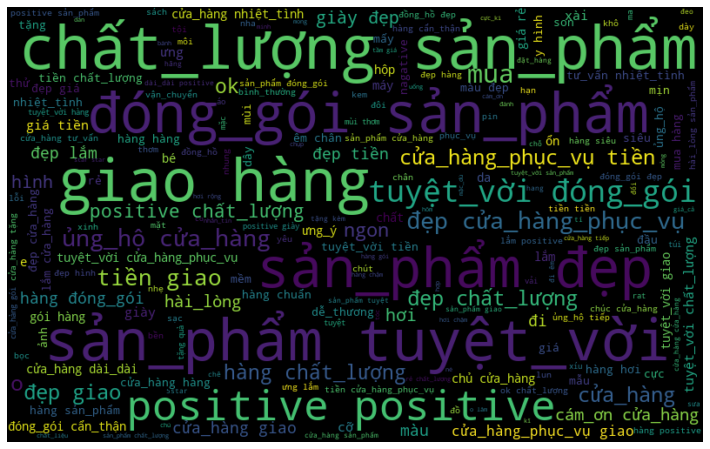

In [98]:
# positive
words = " ".join(sent for sent in train_df['comment_normalize'][train_df['label'] == 0])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

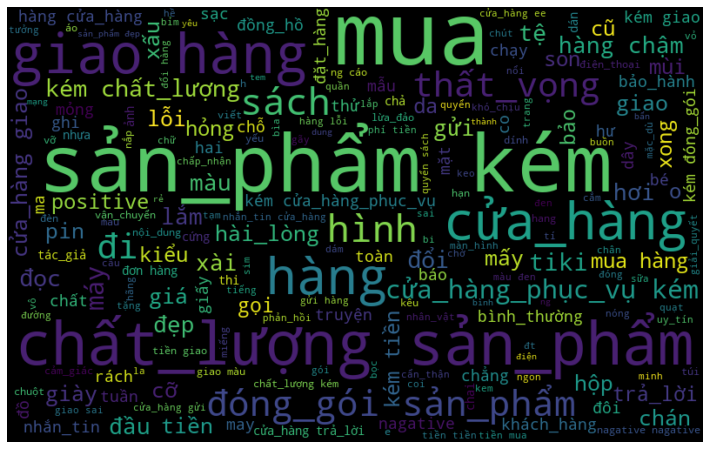

In [97]:
#negative
words = " ".join(sent for sent in train_df['comment_normalize'][train_df['label'] == 1])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
train_df.to_csv("./data/data_normalized.csv", index=False)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(train_df.comment, train_df.label, test_size=0.3,random_state=42)

In [55]:
steps = []
stop_ws = (u'rằng',u'thì',u'là',u'mà')
steps.append(('CountVectorizer', CountVectorizer(ngram_range=(1,5),stop_words=stop_ws,max_df=0.5, min_df=5)))
steps.append(('tfidf', TfidfTransformer(use_idf=False, sublinear_tf = True,norm='l2',smooth_idf=True)))
steps.append(('classifier',  LinearSVC(fit_intercept = True,multi_class='crammer_singer', C=1)))
clf = Pipeline(steps)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report1 = metrics.classification_report(y_test, y_pred, labels=[1,0], digits=3)

In [56]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
report2 = metrics.classification_report(y_train, y_pred, labels=[1,0], digits=3)

In [53]:
cross_score = cross_val_score(clf, X_train,y_train, cv=5)

In [58]:
#ERRO ANALYSIS
for id,x, y1, y2 in zip(train_df.id, X_train, y_train, y_pred):
    if y1 != y2:
        # CHECK EACH WRONG SAMPLE POSSITIVE/NAGATIVE
        if y1!=1:#0:
            print(id,x, y1, y2)

#CROSS VALIDATION
cross_score = cross_val_score(clf, X_train,y_train, cv=5)

#REPORT
print('DATASET LEN %d'%(len(X_train)))
print('TRAIN 70/30 \n\n',report1)
print('TRAIN OVERFITING\n\n',report2)
print("CROSSVALIDATION 5 FOLDS: %0.4f (+/- %0.4f)" % (cross_score.mean(), cross_score.std() * 2))

train_000103 quá dơ chua gi ma rai roi 0 1
train_000131 chất xấu lắm không ngấm nước 0 1
train_000145 nồi lấy về không nấu được không nóng không gì hết 0 1
train_000151 hũ nhựa có nắp kép ở trong sạch sẽ 0 1
train_000189 chất luomg qua kem 0 1
train_000200 sản phẩm không tương xứng với giá tiền quá xấu quá tệ không nên mua 0 1
train_000249 chất lượng sản phẩm rất kém nó còn bị bể nát hết 0 1
train_000250 giao sai 1mẫu 0 1
train_000395 thất vọng mua đồng hồ nhật mà nhận đồng hồ china 0 1
train_000418 sản phẩm tạm được hạt nhỏ lần này không ngon bằng lần trước 0 1
train_000512 son không lì lắm 0 1
train_000543 giày bị bung keo ở đế và có rất nhiều vết xước 0 1
train_000545 chất lượng bình thường không được như ý đúng là tiền nào của lấy đầu giầy bị móp không căng phồng giống hình 0 1
train_000571 không chất luong nhu hang xdesign 0 1
train_000583 cửa hàng e giao hàng chậm bình chỉ có 1 chế độ nấu chậm thôi không có còi báo 0 1
train_000608 dán ốp vào như là màn hình xài hoa văn vậy lần đ

DATASET LEN 11260
TRAIN 70/30 

               precision    recall  f1-score   support

           1      0.866     0.907     0.886      2036
           0      0.930     0.898     0.914      2791

    accuracy                          0.902      4827
   macro avg      0.898     0.903     0.900      4827
weighted avg      0.903     0.902     0.902      4827

TRAIN OVERFITING

               precision    recall  f1-score   support

           1      0.925     0.969     0.946      4771
           0      0.976     0.942     0.959      6489

    accuracy                          0.953     11260
   macro avg      0.951     0.955     0.953     11260
weighted avg      0.954     0.953     0.954     11260

CROSSVALIDATION 5 FOLDS: 0.8993 (+/- 0.0132)
